# 🎯 Netflix Case Study – One-Sample t-Test

## 📌 Problem Statement
Netflix wants to assess whether the **average watch time per user per day** has crossed the internal benchmark of **90 minutes/day**.

## 🧠 5W1H Analysis

- **What**: Average watch time per user per day
- **Why**: To measure engagement and retention improvements after new content drops
- **When**: Data from the last 30 days
- **Where**: Across multiple states in India
- **Who**: Netflix users (mobile & desktop)
- **How**: Conduct a One-Sample t-Test against the 90-minute benchmark


In [1]:
# 📦 Importing Required Libraries
import pandas as pd
import numpy as np

# Simulate dataset
np.random.seed(42)
data = pd.DataFrame({
    'User_ID': np.arange(1, 501),
    'State': np.random.choice(['Maharashtra', 'Karnataka', 'Delhi', 'Tamil Nadu', 'West Bengal'], 500),
    'Platform': np.random.choice(['Mobile', 'Desktop'], 500),
    'User_Type': np.random.choice(['Basic', 'Premium'], 500),
    'Watch_Time_Minutes': np.random.normal(loc=92, scale=10, size=500)  # mean > 90 to test significance
})

data.head()

,User_ID,State,Platform,User_Type,Watch_Time_Minutes
0,1,Tamil Nadu,Desktop,Premium,95.261330
1,2,West Bengal,Desktop,Basic,79.488864
2,3,Delhi,Desktop,Premium,101.240270
3,4,West Bengal,Mobile,Premium,90.150979
4,5,West Bengal,Desktop,Basic,86.772770


User_ID               0
State                 0
Platform              0
User_Type             0
Watch_Time_Minutes    0
dtype: int64
          User_ID  Watch_Time_Minutes
count  500.000000          500.000000
mean   250.500000           92.989081
std    144.481833            9.904140
min      1.000000           63.037446
25%    125.750000           86.371303
50%    250.500000           93.305370
75%    375.250000           99.288822
max    500.000000          118.323821
State
Tamil Nadu     112
Maharashtra    109
Karnataka       95
West Bengal     93
Delhi           91
Name: count, dtype: int64
Platform
Mobile     267
Desktop    233
Name: count, dtype: int64
User_Type
Basic      258
Premium    242
Name: count, dtype: int64


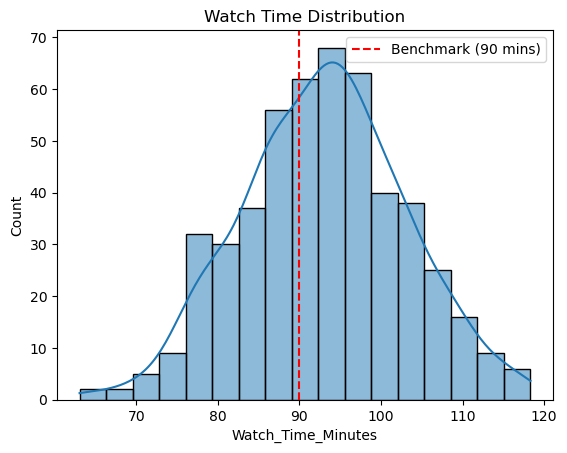

In [3]:
# 🔍 Data Cleaning
print(data.isnull().sum())

# 🧪 EDA
print(data.describe())
print(data['State'].value_counts())
print(data['Platform'].value_counts())
print(data['User_Type'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot
sns.histplot(data['Watch_Time_Minutes'], kde=True)
plt.axvline(x=90, color='red', linestyle='--', label='Benchmark (90 mins)')
plt.title("Watch Time Distribution")
plt.legend()
plt.show()


In [11]:
# 🧪 One-Sample t-Test
from scipy.stats import ttest_1samp

# Null Hypothesis (H0): Mean = 90 mins
# Alternate Hypothesis (H1): Mean > 90 mins

t_stat, p_value = ttest_1samp(data['Watch_Time_Minutes'], popmean=90)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# One-tailed test (mean > 90)
p_value_one_tailed = p_value / 2
print(f"One-tailed P-Value: {p_value_one_tailed:.4f}")


T-Statistic: 6.7485
P-Value: 0.0000
One-tailed P-Value: 0.0000


## ✅ Interpretation + Business Impact

- 📊 **T-Statistic** and **P-Value** help us determine if the average watch time is **significantly greater than 90 minutes**.
- 🎯 If **p < 0.05**, we reject the null hypothesis and confirm increased user engagement.

### 💼 Business Impact

- If proven, Netflix can:
  - Consider the recent content push a success.
  - Use the result to drive marketing campaigns.
  - Continue investing in similar content categories.
